# Predicting Newsletter Subscription Using Player Demographics and Gameplay Characteristics

# 1. Introduction

## 1.1 Background & Motivation

Newsletter subscriptions are an important way for gaming platforms to communicate with their players. Subscribed players receive updates, announcements, and relevant information, which can help maintain engagement over time. However, not all players choose to subscribe. Therefore, it may be useful to understand whether certain player characteristics are associated with this decision. Identifying these patterns can help platforms better tailor their newsletters to their gaming community and better understand the types of players who are more likely to engage with newsletter content.

## 1.2 Research Question

The goal of this project is to determine whether specific player characteristiccs can be used to predict newsletter subscription. Therefore, the research question guiding this analysis is: \
\
**Can player characteristics (such as age, gender, experience level, and total reported play hours) predict newsletter subscription in the players dataset?**

## 1.3 Dataset Description

To answer this question, we used the players.csv dataset. This dataset contains informaiton on 196 players, with each row representing one individual. The dataset includes the following variables:

| Variable       | Type      | Description                                                   |
| -------------- | --------- | ------------------------------------------------------------- |
| `experience`   | Character | Player Minecraft experience level                             |
| `subscribe`    | Logical   | Whether player subscribed to game-related newsletter          |
| `hashedEmail`  | Character | Unique anonymous player identifier (Linked with sessions.csv) |
| `played_hours` | Double    | Total hours player has spent on server                        |
| `name`         | Character | Player in-game name                                           |
| `gender`       | Character | Player gender                                                 |
| `Age`          | Double    | Player age                                                    |

Note that the dataset also includes identifiers such as *hashedEmail* and *name*, which are not used in the analysis. Although a separate `sessions.csv` dataset is available, all variables needed to address the research question are contained within the `players.csv` dataset. Therefore, the analysis focuses solely on this dataset.

# 2. Methods & Results

## 2.1 Data Loading

To begin the analysis, the `players.csv` dataset was loaded into Jupyter and added to an R notebook. This dataset contains the variables needed to answer the research question. The code below loads the dataset and displays its structure to confirm that it imported correctly.

In [1]:
# Set parameters for graphs and tables
options(repr.plot.width = 8, 
        repr.plot.height = 8, 
        repr.matrix.max.rows = 6)

# Load required libraries
library(tidyverse)

# Load players data
players_data <- read_csv("data/players.csv")
players_data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


## 2.2 Data Cleaning & Preparation

Before conducting the analysis, the dataset was examined for missing values, incorrect data types, and any inconsistencies. Two observations in the *Age* variable were missing. Because age is an important predictor for the analysis and the number of missing cases was small, these rows were removed to avoid complications during modeling. All other variables were complete.

Next, the variables *name* and *hashedEmail* were removed from the dataset. These fields contained identifying information and were not relevant for answering the research question, nor were they useful for prediction.

Since k-nearest neighbours (kNN) classification requires numeric predictors, the categorical variables *gender* and *experience* were converted into numeric form using the `as.numeric(as.factor())` transformation. This approach ensures that these variables can be used in the distance calculations that kNN relies on. The outcome variable *subscribe* was converted into a factor to clearly represent the two classes (“TRUE” and “FALSE”) during model fitting.

After these steps, the dataset consisted entirely of cleaned and numeric predictors—*Age*, *played_hours*, *gender*, and *experience*—along with the factor outcome variable *subscribe*. This prepared dataset was then used for modeling.

In [2]:
# Check for missing values
colSums(is.na(players_data)) # Shows that Age column is missing two values

# Remove rows with missing Age values
players_data_clean <- players_data |> 
                        filter(!is.na(Age))
players_data_clean

# Convert categorical variables to numerical variables
players_data_cleanest <- players_data_clean |> 
                        mutate(gender = as.numeric(as.factor(gender)), 
                               experience = as.numeric(as.factor(experience)), 
                               subscribe = as.factor(subscribe)) |> 
                        select(-hashedEmail, -name)
players_data_cleanest

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


experience,subscribe,played_hours,gender,Age
<dbl>,<fct>,<dbl>,<dbl>,<dbl>
3,TRUE,30.3,3,9
5,TRUE,3.8,3,17
5,FALSE,0.0,3,17
⋮,⋮,⋮,⋮,⋮
5,FALSE,0.3,3,22
1,FALSE,0.0,5,57
1,FALSE,2.3,3,17


## 2.3 Exploratory Data Analysis

Basic exploratory analysis was completed to better understand the dataset. Since *Age* and *played_hours* are the only quantitative variables, their mean values were calculated. These values give a general sense of the typical player in the dataset. Visualizations were also created to explore how each variable relates to newsletter subscription.

In [3]:
# Average age calculation
mean(players_data_clean$Age)

# Average hours played calculation
mean(players_data_clean$played_hours)

[1] 21.13918

[1] 5.904639

Players Dataset Averages Table:
| Average Hours Played | Average Age (Years) |
| -------------------- | ------------------- |
| 5.85                 | 21.14               |

## 2.4 Exploratory Visualizations

Visualizations were created to explore whether any noticeable patterns exist between the predictors and newsletter subscription.

### Figure 1. Experience Level by Subscription Status

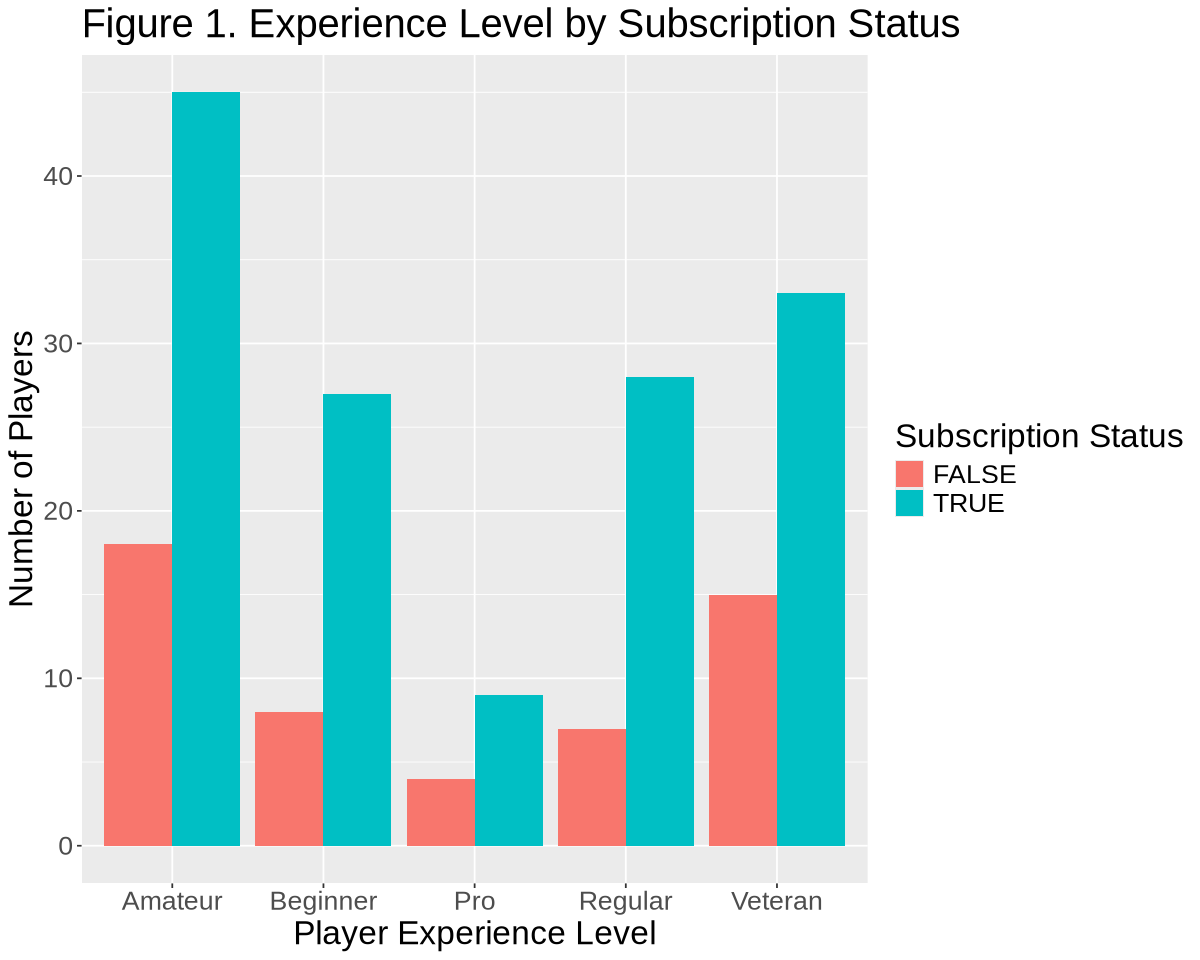

In [4]:
# Modify plot size
options(repr.plot.width = 10, 
        repr.plot.height = 8)

# Create barplot
exp_by_sub_barplot <- players_data_clean |> 
                        ggplot(aes(x = experience, 
                                   fill = subscribe)) + 
                            geom_bar(position = "dodge") + 
                            labs(x = "Player Experience Level", 
                                 y = "Number of Players", 
                                 fill = "Subscription Status", 
                                 title = "Figure 1. Experience Level by Subscription Status") + 
                            theme(text = element_text(size = 20))
exp_by_sub_barplot

Figure 1 illustrates how subscribed and non-subscribed players are distributed across various experience levels. Overall, the ratio of subscribed to non-subscribed players apears relatively similar across all experience levels. This suggests that experience level alone does not have a strong association with newsletter subscription.

### Figure 2. Proportion of Newsletter Subscription by Gender

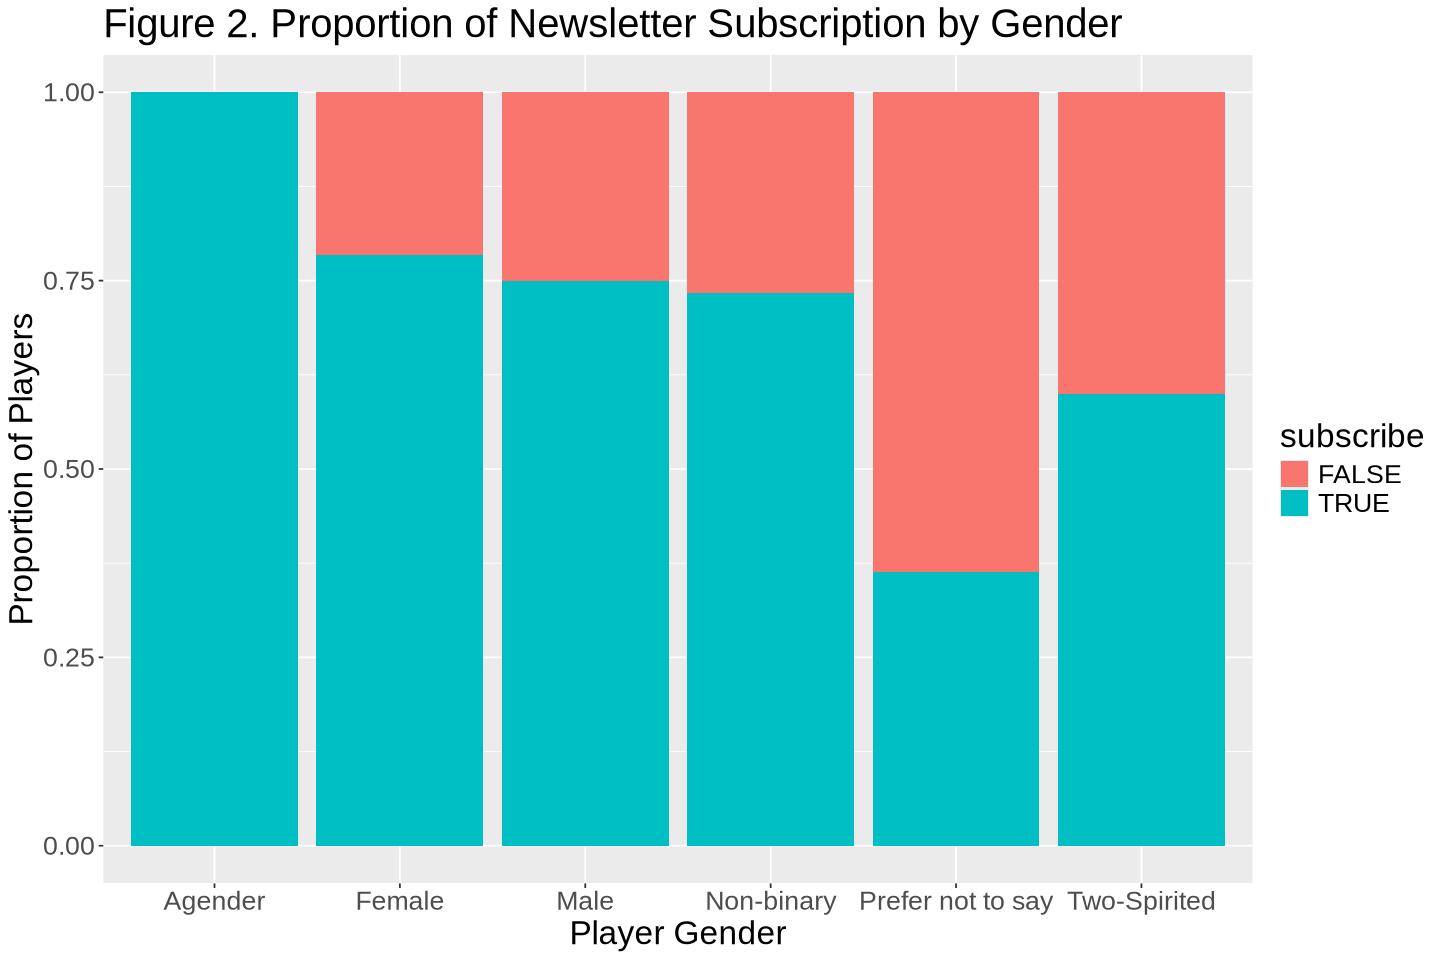

In [5]:
# Modify plot size
options(repr.plot.width = 12, 
        repr.plot.height = 8)

# Create barplot
players_ns_by_gender <- players_data_clean |> 
                        ggplot(aes(x = gender, fill = subscribe)) + 
                            geom_bar(position = "fill") + 
                            labs(title = "Figure 2. Proportion of Newsletter Subscription by Gender", 
                                 x = "Player Gender", 
                                 y = "Proportion of Players") + 
                            theme(text = element_text(size = 20))
players_ns_by_gender

Figure 2 shows proportional bar charts showing the relative frequency of subscribed and unsubscribed players across gender categories. Subscription proportions appear broadly similar across gender categories. However, smaller sample sizes within some categories limit the strength of conclusions that can be drawn from this figure.

### Figure 3. Player Age by Subscription Status

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


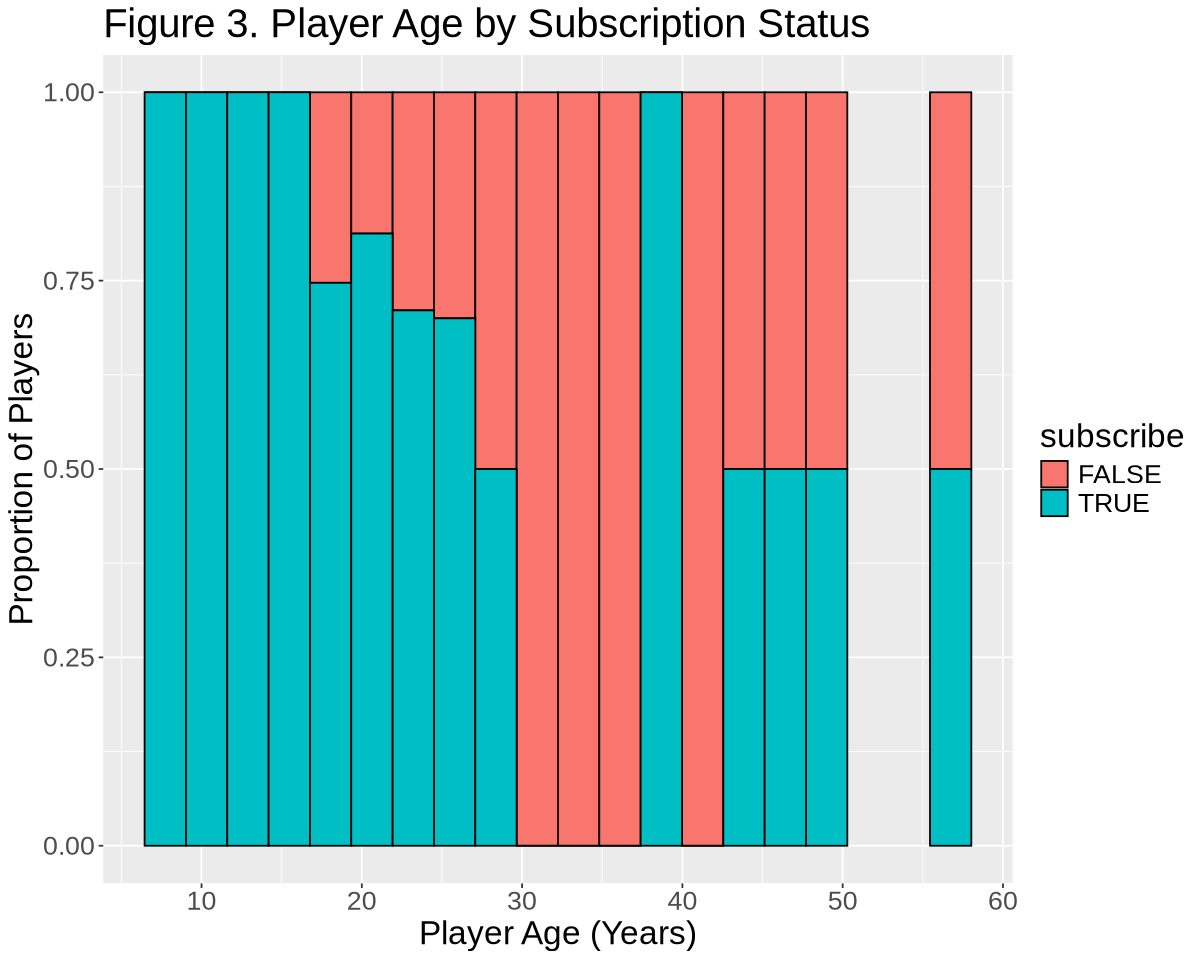

In [6]:
# Modify plot size
options(repr.plot.width = 10, 
        repr.plot.height = 8)

# Create histogram
players_age_plot <- players_data_clean |> 
                    ggplot(aes(x = Age, fill = subscribe)) + 
                        geom_histogram(position = "fill", 
                                       bins = 20, 
                                       color = "black") + 
                        labs(x = "Player Age (Years)", 
                             y = "Proportion of Players",
                             title = "Figure 3. Player Age by Subscription Status") + 
                        theme(text = element_text(size = 20))
players_age_plot

Figure 3 displays whether age distribution differs between subscribed and unsubscribed players. It appears players aged from 0-28 are far more likely to be subscribers, with those between 28-38 not wanting to be subscribers. Though, when we observe ages over 43 there is a 50-50 split.

## 2.5 kNN Classification Analysis

Because the outcome variable (*subscribe*) is a binary categorical variable, a k-nearest neighbours (kNN) classification model was used to investigate whether a player's characteristics can predict newsletter subscription. kNN is a non-parametric method that classifies observations based on the characteristics of the “nearest” data points, making it useful for detecting patterns in multidimensional space.

This approach is appropriate for the project because:
* It makes minimal assumptions about the underlying data distribution,
* It can incorporate multiple numeric predictors simultaneously, and
* It allows us to explore whether similarities in demographic and behavioral characteristics correspond to similarities in subscription behavior.

### 2.5.1 Data Preparation for kNN

Before fitting the kNN model, all numeric predictors (*Age*, *played_hours*, *gender*, and *experience*) were standardized using centering and scaling. Standardization is essential for kNN because predictors measured on different scales (for example, age in years vs. hours played) would otherwise contribute unequally to distance calculations.

The dataset was then randomly divided into a training set (75%) and a testing set (25%) to evaluate the model’s performance on unseen data. A range of values for k (the number of nearest neighbours) was tested using 5-fold cross-validation on the training data. For each candidate value of k, an estimated accuracy value was computed. These accuracy estimates were later used to identify the optimal value of k for the model.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5441544,5,0.02507506,Preprocessor1_Model01
3,accuracy,binary,0.6975862,5,0.03041332,Preprocessor1_Model02
5,accuracy,binary,0.7458949,5,0.02961077,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model23
47,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model24
49,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model25


[1] 5

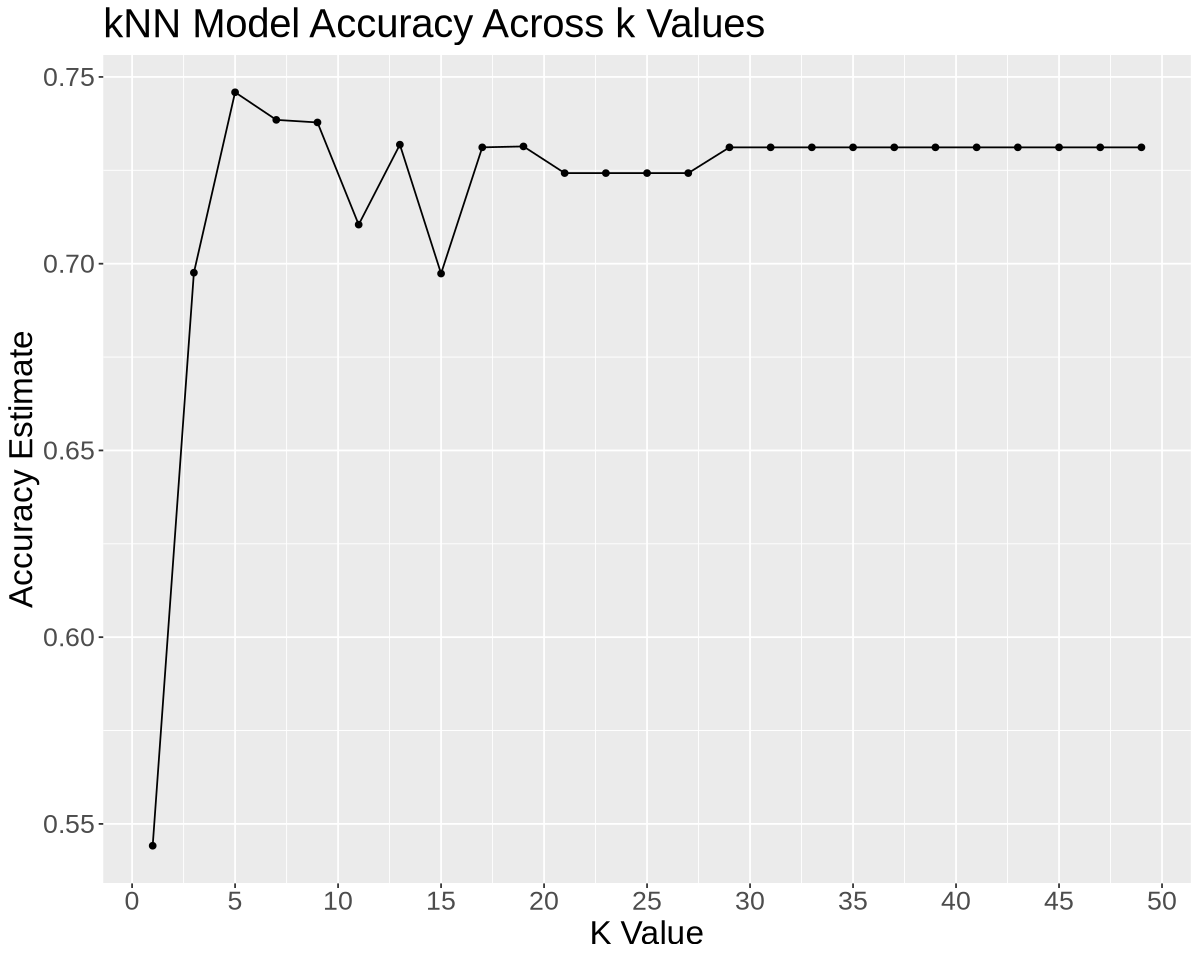

In [18]:
# Load required library for kNN model
library(tidymodels)

# Set seed (for reproducibility)
set.seed(001)

# Split data into testing and training sets
players_data_split <- players_data_cleanest |> 
                        initial_split(prop = 0.75, strata = subscribe)
#players_data_split
players_training <- training(players_data_split)
#players_training
players_testing <- testing(players_data_split)
#players_testing

# Create kNN Model Spec
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |> 
                    set_mode("classification")
#players_spec

# Create recipe
players_recipe <- recipe(subscribe ~ ., data = players_training) |> 
                    step_scale(all_predictors()) |> 
                    step_center(all_predictors())
#players_recipe

# Create workflow
players_workflow <- workflow() |> 
                add_recipe(players_recipe) |> 
                add_model(players_spec)
#players_workflow

# Create vfold
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)
#players_vfold

# Create k values for tuning
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))
#k_vals

# Get Results for k values
players_results <- players_workflow |> 
                    tune_grid(resamples = players_vfold, grid = k_vals) |> 
                    collect_metrics()
#players_results

# Find best k value to use
players_accuracies <- players_results |> 
                    filter(.metric == "accuracy")
players_accuracies

# Create graph to see best k value to use for kNN model
accuracy_vs_kval <- players_accuracies |> 
                        ggplot(aes(x = neighbors, 
                                   y = mean)) + 
                            geom_point() + 
                            geom_line() + 
                        scale_x_continuous(breaks = seq(0, 50, by = 5)) + 
                        labs(x = "K Value", 
                             y = "Accuracy Estimate",
                             title = "kNN Model Accuracy Across k Values") + 
                        theme(text = element_text(size = 20))
accuracy_vs_kval

# Isolate best k value to use for kNN model
best_k <- players_accuracies |> 
            arrange(desc(mean)) |> 
            head(1) |> 
            pull(neighbors)
best_k         

The best k-value to use in the kNN model is k = 5.

### 2.5.2 Creating Optimal kNN Model

In [27]:
# Create best kNN spec
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
                    set_engine("kknn") |> 
                    set_mode("classification")
#players_best_spec

# new workflow to fit data using best kNN spec
players_fit <- workflow() |> 
                add_recipe(players_recipe) |> 
                add_model(players_best_spec) |> 
                fit(data = players_training)
#players_fit

# Predict testing data using created model
players_testing_predictions <- predict(players_fit, players_testing) |> 
                        bind_cols(players_testing)
players_testing_predictions

# Find estimated precision
players_testing_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

# Find recall
levels(players_testing$subscribe) # shows factor levels for subscribe

players_testing_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level = "second") # Use event_level = "second" because positive event is second

# Generate confusion matrix
players_confusion <- players_testing_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
players_confusion

.pred_class,experience,subscribe,played_hours,gender,Age
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
TRUE,1,TRUE,0.7,2,21
TRUE,4,TRUE,0.1,3,21
TRUE,1,TRUE,0.0,2,17
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,1,TRUE,0.0,3,20
FALSE,1,FALSE,0.0,5,57
TRUE,1,FALSE,2.3,3,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7755102


[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


          Truth
Prediction FALSE TRUE
     FALSE     2    0
     TRUE     11   36

# 3. Discussion

## 3.1 Interpretation of kNN Model Performance

Using the optimal value of k = 5, the final kNN model was fit to the training data and evaluated on the held-out testing dataset. The model achieved a testing accuracy of approximately 0.78, indicating that it correctly predicted newsletter subscription status for 78% of players in the testing dataset. This suggests that the predictors (*Age*, *played_hours*, *gender*, and *experience*) contain meaningful information related to subscription behaviour.

The confusion matrix revealed important details about how the model performed across the two subscription classes. The model demonstrated excellent performance in identifying actual subscribers, correctly classifying all players who were truly subscribed (recall = 1), meaning it did not miss any of them.

However, the model struggled to correctly identify non-subscribers. It correctly predicted only 2 non-subscribers, while incorrectly predicting “subscribed” for 11 players who did not subscribe. This indicates that the model tends to overpredict subscription, classifying many players as subscribed even when they are not.

Overall, the kNN model performed reasonably well in terms of accuracy, but its predictions are skewed toward the subscribed group, suggesting that it is better at recognizing subscribers than non-subscribers.

## 3.2 Comparison of Findings to Expectations

At the start, we expected that more engaged and experienced players—those with higher play hours and higher experience levels—would be more likely to subscribe to the newsletter. We also expected that variables such as gender would play a smaller role. The plots partially supported these expectations. Younger players appeared more likely to subscribe, whereas experience level and gender showed very similar subscription proportions across categories, suggesting a weak relationship with subscription.

## 3.3 Practical Implications

These relationships could have meaningful implications for how software developers market their video game products. Since younger players appeared more likely to subscribe, companies may choose to tailor their advertising strategies toward this demographic. For example, promotion for a Minecraft-related product could make use of colourful visuals or recognizable character mascots to capture the attention of younger audiences. Additional data analysis could also help determine which platforms younger players engage with most, such as child-safe social media channels or educational apps. Regarding model accuracy, the k-NN model performed well in identifying subscribers but struggled to correctly classify non-subscribers. In practice, this imbalance suggests that marketing strategies should not rely heavily on gender or experience level and should instead focus more broadly on age-related trends or incorporate additional data to improve predictive balance.

## 3.4 Limitations & Furture Directions

This analysis was limited by the small size of the dataset, which reduces how confidently the results can be generalized. Converting categorical variables into simple numeric values may have also weakened the model by oversimplifying important differences between categories. In the future, using models that handle categorical data more naturally could improve performance. Furthermore, collecting more detailed gameplay information (like session frequency or playstyle) may also lead to stronger and more balanced predictions.

# 4. References

Timbers, T., Campbell, T., & Lee, M. (2024). Data science: A first introduction. Retrieved from the online textbook for DSCI 100 at the University of British Columbia.

DSCI 100 Teaching Team. (2025). Minecraft server player dataset (players.csv) (sessions.csv). University of British Columbia.